In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split


In [65]:
data=pd.read_csv('/home/waheed/Desktop/Mlops/Data/dataset.csv')

data.head(10)


,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other
5,27,2020-03-07 23:18:15,APPNP and PPNP,"A PyTorch implementation of ""Predict then Prop...",other
6,28,2020-03-07 23:23:46,Attributed Social Network Embedding,A sparsity aware and memory efficient implemen...,other
7,29,2020-03-07 23:45:38,Signed Graph Convolutional Network,"A PyTorch implementation of ""Signed Graph Conv...",other
8,45,2020-03-08 00:39:08,SimGNN,"A PyTorch implementation of ""SimGNN: A Neural ...",other
9,61,2020-03-16 17:35:22,Using JAX to Improve Separable Image Filters,Optimizing the filters to improve the filtered...,computer-vision


In [3]:
data['tag'].value_counts()

tag
natural-language-processing    310
computer-vision                285
other                          106
mlops                           63
Name: count, dtype: int64

In [ ]:
# test_size=0.2
# train_df, val_df=train_test_split(data, test_size= test_size, stratify= data['tag'], random_state= 42)

In [ ]:
# val_df.tag.value_counts()*((1-test_size)/test_size)

tag
natural-language-processing    248.0
computer-vision                228.0
other                           84.0
mlops                           52.0
Name: count, dtype: float64

In [ ]:
#EDA Analysis

In [4]:
from collections import Counter
import matplotlib .pyplot as plt
import seaborn as sns 
import warnings


In [5]:
all_tags= Counter(data.tag)
all_tags.most_common()

[('natural-language-processing', 310),
 ('computer-vision', 285),
 ('other', 106),
 ('mlops', 63)]

/tmp/ipykernel_96451/1307108218.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tags,rotation=0, fontsize=8)


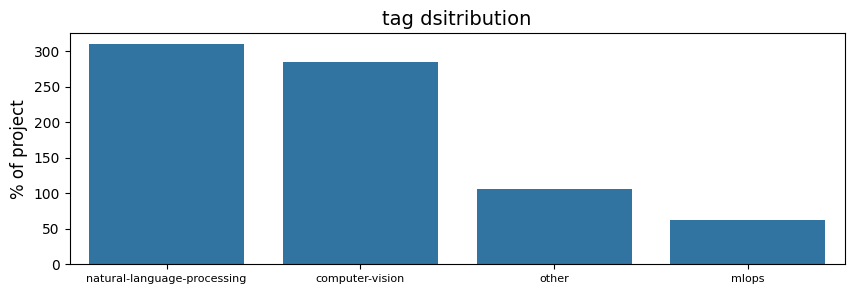

In [6]:
tags, tags_count= zip(*all_tags.most_common())
plt.figure(figsize=(10,3))
ax= sns.barplot(x=list(tags), y=list(tags_count))
ax.set_xticklabels(tags,rotation=0, fontsize=8)
plt.title("tag dsitribution", fontsize=14)
plt.ylabel("% of project", fontsize=12)

plt.show()

In [3]:
# preprocessing
# ! uv add nltk
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re


In [17]:
data['text']= data.title +" "+ data.description

NameError: name 'data' is not defined

In [16]:
nltk.download("stopwords")

STOPWORDS= stopwords.words('english')


[nltk_data] Downloading package stopwords to /home/waheed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def clean_text(text, stopwords= STOPWORDS):

    text= text.lower()
    pattern = re.compile(r'\b(' + r"|".join(stopwords) + r")\b\s*")
    text = pattern.sub('', text)

    text = re.sub(r"([!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~])", r" \1 ", text)  # add spacing
    text = re.sub("[^A-Za-z0-9]+", " ", text)  # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()  # strip white space at the ends
    text = re.sub(r"http\S+", "", text)  #  remove links

    return text






In [135]:
original_data= data.copy()

data.text= data.text.apply(clean_text)

data= data.drop(columns=['id','description','created_on','title'], errors='ignore')

data= data.dropna(subset= ['tag'])

data= data[['text', 'tag']]

In [66]:
#Encoding 

tag = data.tag.unique().tolist()
num_classes= len(tag)

class_to_index= {tag:i for i, tag in enumerate(tag)}


In [137]:
data['tag']= data['tag'].map(class_to_index)



In [138]:
def decode(indicies, index_to_class):
    return [index_to_class[index] for index in indicies]


In [139]:
index_to_class= {v:k for k,v in class_to_index.items()}
decode(data.head()['tag'].values, index_to_class= index_to_class)

['computer-vision', 'computer-vision', 'other', 'other', 'other']

In [36]:
! uv add transformers

import numpy as np
from transformers import BertTokenizer

                                    
                                                    

Running 0: 0.00 row [34:45, ? row/s]  
                                    
                                                    

Running 0: 0.00 row [34:45, ? row/s]  
                                    
                                                    

Running 0: 0.00 row [34:45, ? row/s]  
                                    
                                                    

Running 0: 0.00 row [34:45, ? row/s]  
                                    
                                                    

Running 0: 0.00 row [34:45, ? row/s]  
                                    
                                                    

Running 0: 0.00 row [34:45, ? row/s]  
                                    
                                                    

Running 0: 0.00 row [34:45, ? row/s]  


Resolved 63 packages in 6ms


                                    
                                                    

Running 0: 0.00 row [34:45, ? row/s]  


Audited 57 packages in 0.54ms


- MapBatches(preprocessor) 1: 0.00 row [34:45, ? row/s]
                                                                                                                            
                                                    

Running Dataset: dataset_26_0. Active & requested resources: 0/8 CPU, 0.0B/464.3MB object store: : 0.00 row [34:47, ? row/s]


                                                                                                                                                             

- MapBatches(preprocessor): Tasks: 1 [backpressured:tasks]; Actors: 0; Queued blocks: 199; Resources: 1.0 CPU, 256.0MB object store: : 0.00 row [34:47, ? row/s]





- limit=1: Tasks: 0; Actors: 0; Queued blocks: 0; Resources: 0.0 CPU, 0.0B object store: : 0.00 row [34:47, ? row/s]


In [153]:
#converting series in to List[str]

# data['text']=data['text'].astype(str).tolist()

In [ ]:
# tokenizer= BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased", return_dict= False)
# data_list= data['text'].astype(str).tolist()

# encoded_data = tokenizer(data_list, return_tensors= 'np', padding='longest')


In [ ]:
def tokenize(batch):
    tokenizer= BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased", return_dict= False)

    encoded_data= tokenizer(batch['text'].tolist(), return_tensors='np', padding= 'longest')

    return dict(ids= encoded_data['input_ids'], masks= encoded_data['attention_mask'], target= np.array(batch['tag']))

In [32]:
def preprocessor(data,class_to_index):
    data['text']= data.title + " " + data.description
    data['text']= data.text.apply(clean_text)
    data=data.drop(columns=['title','id', 'created_on','description'])
    data = data[['text','tag']]
    data['tag']= data['tag'].map(class_to_index)
    outputs= tokenize(data)

    return outputs




In [1]:
! uv add ray 

import ray
from ray.data import Dataset
import numpy as np

ray.data.DatasetContext.get_current().execution_options.preserve_order= True

Resolved 63 packages in 7ms
Audited 57 packages in 0.38ms


/home/waheed/Desktop/Mlops/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-17 10:32:26,813	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-07-17 10:32:27,896	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [ ]:
data_path= '/home/waheed/Desktop/Mlops/Data/dataset.csv'
ds= ray.data.read_csv(data_path)



2025-07-17 10:32:32,710	INFO worker.py:1917 -- Started a local Ray instance.


(raylet) [2025-07-17 10:32:41,622 E 102575 102599] (raylet) file_system_monitor.cc:116: /tmp/ray/session_2025-07-17_10-32-29_635169_102223 is over 95% full, available space: 1.79251 GB; capacity: 95.7081 GB. Object creation will fail if spilling is required.
(raylet) [2025-07-17 10:32:51,644 E 102575 102599] (raylet) file_system_monitor.cc:116: /tmp/ray/session_2025-07-17_10-32-29_635169_102223 is over 95% full, available space: 1.79216 GB; capacity: 95.7081 GB. Object creation will fail if spilling is required.
(raylet) [2025-07-17 10:33:01,661 E 102575 102599] (raylet) file_system_monitor.cc:116: /tmp/ray/session_2025-07-17_10-32-29_635169_102223 is over 95% full, available space: 1.79213 GB; capacity: 95.7081 GB. Object creation will fail if spilling is required.
(raylet) [2025-07-17 10:33:11,679 E 102575 102599] (raylet) file_system_monitor.cc:116: /tmp/ray/session_2025-07-17_10-32-29_635169_102223 is over 95% full, available space: 1.79195 GB; capacity: 95.7081 GB. Object creation

(raylet) The node with node id: 2f114f6626bef1fddc67c55681f05a116647d98051687f18eb7fafea and address: 20.20.20.104 and node name: 20.20.20.104 has been marked dead because the detector has missed too many heartbeats from it. This can happen when a 	(1) raylet crashes unexpectedly (OOM, etc.) 
	(2) raylet has lagging heartbeats due to slow network or busy workload.
(raylet) Raylet is terminated. Termination is unexpected. Possible reasons include: (1) SIGKILL by the user or system OOM killer, (2) Invalid memory access from Raylet causing SIGSEGV or SIGBUS, (3) Other termination signals. Last 20 lines of the Raylet logs:
    [2025-07-17 12:44:04,663 W 102575 102575] (raylet) node_manager.cc:3009: Memory usage above threshold but no workers are available for killing.This could be due to worker memory leak andidle worker are occupying most of the memory.
    [2025-07-17 12:44:04,675 I 102575 102575] (raylet) ray_syncer_bidi_reactor_base.h:182: Failed to read the message from: 0000000000000

(raylet) [2025-07-17 12:42:28,419 E 102575 102599] (raylet) file_system_monitor.cc:116: /tmp/ray/session_2025-07-17_10-32-29_635169_102223 is over 95% full, available space: 0.0919151 GB; capacity: 95.7081 GB. Object creation will fail if spilling is required.
(raylet) [2025-07-17 12:42:30,048 W 169283 169283] gcs_rpc_client.h:151: Failed to connect to GCS at address 20.20.20.104:41745 within 5 seconds.
(raylet) [2025-07-17 12:42:34,447 E 102575 102575] (raylet) node_manager.cc:3193: 37 Workers (tasks / actors) killed due to memory pressure (OOM), 0 Workers crashed due to other reasons at node (ID: 2f114f6626bef1fddc67c55681f05a116647d98051687f18eb7fafea, IP: 20.20.20.104) over the last time period. To see more information about the Workers killed on this node, use `ray logs raylet.out -ip 20.20.20.104`
(raylet) 
(raylet) Refer to the documentation on how to address the out of memory issue: https://docs.ray.io/en/latest/ray-core/scheduling/ray-oom-prevention.html. Consider provisioning

In [ ]:
def stratified_split_ray_dataset(ds: Dataset, label_col:str,test_size: float= 0.2,seed:int= 42):
    
    
    label_values= ds.unique(column=label_col)
    train_items, val_items= [],[]
    rng= np.random.default_rng(seed)


    for label_row in label_values:
        # label= label_row[label_col]

        subset= ds.filter(lambda row: row[label_col]== label_row)
        count= subset.count()

        
        items= subset.take_all()

        rng.shuffle(items)

        split_idx= int(count * (1-test_size))

        train_items.extend(items[:split_idx])
        val_items.extend(items[split_idx:])

    
    train_ds= ray.data.from_items(train_items)
    val_ds= ray.data.from_items(val_items)



    return train_ds,val_ds





train_ds, val_ds =stratified_split_ray_dataset(ds, label_col='tag')

2025-07-17 10:32:42,321	INFO dataset.py:3046 -- Tip: Use `take_batch()` instead of `take() / show()` to return records in pandas or numpy batch format.
2025-07-17 10:32:42,342	INFO logging.py:295 -- Registered dataset logger for dataset dataset_2_0
2025-07-17 10:32:42,387	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_2_0. Full logs are in /tmp/ray/session_2025-07-17_10-32-29_635169_102223/logs/ray-data
2025-07-17 10:32:42,388	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_2_0: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> AllToAllOperator[Aggregate] -> LimitOperator[limit=1]
Running 0: 0.00 row [00:00, ? row/s]


























Running Dataset: dataset_2_0. Active & requested resources: 1/8 CPU, 256.0MB/464.3MB object store: : 0.00 row [00:01, ? row/s]
















































Running Dataset: dataset_2_0. Active & requested resources: 0/8 CPU, 138.4KB/464.3MB object store: : 0.00 row [00:04, ? r

In [10]:
tags= train_ds.unique(column='tag')
class_to_index= {tag: i for i, tag in enumerate(tags)}

2025-07-17 10:39:58,065	INFO logging.py:295 -- Registered dataset logger for dataset dataset_18_0
2025-07-17 10:39:58,133	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_18_0. Full logs are in /tmp/ray/session_2025-07-17_10-32-29_635169_102223/logs/ray-data
2025-07-17 10:39:58,137	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_18_0: InputDataBuffer[Input] -> AllToAllOperator[Aggregate] -> LimitOperator[limit=1]
Running 0: 0.00 row [00:00, ? row/s]

















Running Dataset: dataset_18_0. Active & requested resources: 0/8 CPU, 0.0B/464.3MB object store: : 0.00 row [00:01, ? row/s]2025-07-17 10:39:59,294	INFO streaming_executor.py:227 -- ✔️  Dataset dataset_18_0 execution finished in 1.10 seconds
                                                                                                                            
                                                                                                                       

2025-07-17 10:40:10,011	ERROR streaming_executor_state.py:504 -- An exception was raised from a task of operator "MapBatches(preprocessor)". Dataset execution will now abort. To ignore this exception and continue, set DataContext.max_errored_blocks.
Traceback (most recent call last):
  File "/home/waheed/Desktop/Mlops/.venv/lib/python3.12/site-packages/ray/data/_internal/execution/streaming_executor_state.py", line 472, in process_completed_tasks
    bytes_read = task.on_data_ready(
                 ^^^^^^^^^^^^^^^^^^^
  File "/home/waheed/Desktop/Mlops/.venv/lib/python3.12/site-packages/ray/data/_internal/execution/interfaces/physical_operator.py", line 138, in on_data_ready
    raise ex from None
  File "/home/waheed/Desktop/Mlops/.venv/lib/python3.12/site-packages/ray/data/_internal/execution/interfaces/physical_operator.py", line 134, in on_data_ready
    ray.get(block_ref)
  File "/home/waheed/Desktop/Mlops/.venv/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 2

In [33]:
sample_ds = train_ds.map_batches(
    preprocessor,
    fn_kwargs = {'class_to_index': class_to_index},
    batch_format= 'pandas'
)

In [37]:
sample_ds.show(1)

2025-07-17 11:25:52,889	INFO logging.py:295 -- Registered dataset logger for dataset dataset_28_0
2025-07-17 11:25:52,942	INFO logging.py:303 -- dataset_28_0 registers for logging while another dataset dataset_26_0 is also logging. For performance reasons, we will not log to the dataset dataset_28_0 until it is the only active dataset.
2025-07-17 11:25:52,951	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_28_0. Full logs are in /tmp/ray/session_2025-07-17_10-32-29_635169_102223/logs/ray-data
2025-07-17 11:25:52,953	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_28_0: InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(preprocessor)] -> LimitOperator[limit=1]
Running 0: 0.00 row [00:00, ? row/s]


Running Dataset: dataset_28_0. Active & requested resources: 1/8 CPU, 256.0MB/464.3MB object store: : 0.00 row [00:01, ? row/s]
Running Dataset: dataset_28_0. Active & requested resources: 1/8 CPU, 256.0MB/464.3MB object store: : 0.00 row [00:

{'ids': array([  102,  2934,   907, 16278, 26226,  4631,  1904,  2024, 20247,
        7369,  1632,  4631, 26226,  1738, 10472,  5211, 11499,   129,
       25488, 11622,  4000, 23077, 30109,  4000,  2679,  6079, 30109,
       26782,  1535,  1254,  4522, 13329,   133,   103]), 'masks': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 'target': 2}


In [1]:
import torch.nn as nn
from transformers import BertModel
import torch

llm= BertModel.from_pretrained('allenai/scibert_scivocab_uncased', return_dict=False)
embedding_din= llm.config.hidden_size



/home/waheed/Desktop/Mlops/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
embedding_din

768

In [55]:
from transformers import BertTokenizer

text = "Transfer learning with transformers for text classification."

tokenizer= BertTokenizer.from_pretrained('allenai/scibert_scivocab_uncased', return_dcit= False)

batch=tokenizer([text],return_tensors='np', padding='longest')


batch= {k: torch.tensor(v) for k,v in batch.items()}

seq,pool= llm(input_ids= batch['input_ids'], attention_mask= batch['attention_mask'])


In [ ]:
import torch.functional as F
class FinetunedLLM(nn.Module):
    def __init__(self, llm, embedding_din, num_classes,dropout_p):
        super(FinetunedLLM,self).__init__()
        self.llm= llm
        self.dropout= torch.nn.Dropout(dropout_p)
        self.fc1=  torch.nn.Linear(embedding_din, num_classes)
    
    def forward(self, batch):
        ids,masks= batch['input_ids'], batch['attention_mask']
        seq,pool= self.llm(input_ids=ids, attention_mask=masks)
        z= self.dropout(pool)
        z= self.fc1(z)

        return z
    
    @torch.inference_mode()
    def predict(self,batch):
        self.eval()
        z= self(batch)
        y_pred= torch.argmax(z,dim=1).cpu().numpy()
        return y_pred
    
    @torch.inference_mode()
    def predict_prob(self, batch):
        self.eval()
        z= self(batch)
        y_prob= F.softmax(z).cpu().numpy()
        return y_prob


In [70]:
tag=data['tag'].unique().tolist()
num_classes= len(tag)

In [68]:
model= FinetunedLLM(llm, embedding_din, num_classes, dropout_p=0.5)
print(model.named_parameters)

<bound method Module.named_parameters of FinetunedLLM(
  (llm): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31090, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [4]:
# we padded data before in our tokenizer but after split we will need to pad according to out train split 

def pad_array(arr, dtype= np.int32):
    max_len= max(len(row) for row in arr)
    padded_arr= np.zeroes((arr.shape[0], max_len), dtype=dtype)

    for i,row in enumerate(arr):
        padded_arr[i][:len(row)] = row
    
    return padded_arr


In [6]:
def collate_fn(batch):
    batch['ids']= pad_array(batch['ids'])
    batch['masks'] =pad_array(batch['masks'])

    dtypes= {'ids': torch.int32, 'masks': torch.int32, 'targets': torch.int64}
    tensor_batch= {}

    for key,array in batch.items():
        tensor_batch[key]= torch.as_tensor(array,dtype=dtypes[key],device=get_device())
    return tensor_batch
